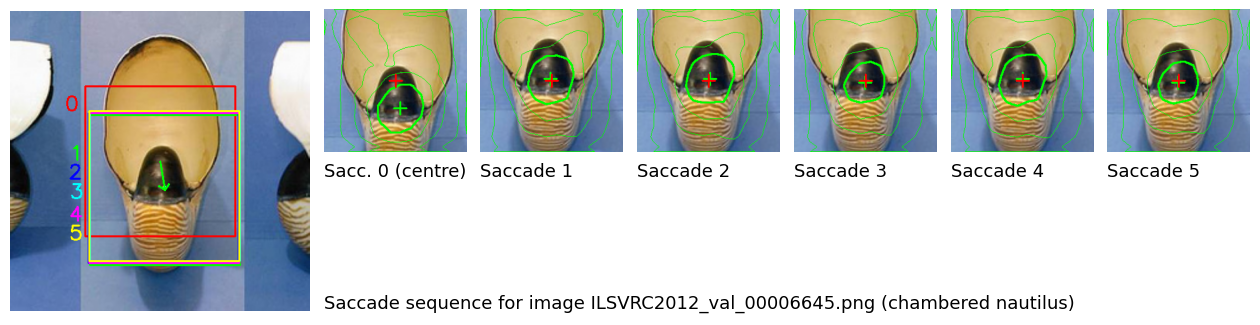

In [4]:
from matplotlib.gridspec import GridSpec
from matplotlib import pyplot as plt
from skimage.io import imread
import os
import glob
import numpy as np
import cv2 as cv

max_saccade = 5
span = 2

def draw_cross(img, xy, colour, arm_len=8, thickness=2):
    x, y = xy[0], xy[1]
    img = cv.line(img, (x + arm_len, y), (x - arm_len, y), colour, thickness=thickness)
    img = cv.line(img, (x, y + arm_len), (x, y - arm_len), colour, thickness=thickness)
    return img

def draw_legend():
    w, h = 224, 224 #10000, 1000
    img = 255 * np.ones((h, w, 3), np.uint8)
    
    draw_cross(img, (50, 50), (255, 0, 0))
    draw_cross(img, (50, 75), (0, 255, 0))
    cv.arrowedLine(img, (5, 100), (60, 100), (0, 0, 255), 2)
    plt.imshow(img)
    plt.text(80, 25, "LEGEND:", fontsize=13, verticalalignment="center")
    plt.text(80, 50, "Patch centre", fontsize=13, verticalalignment="center")
    plt.text(80, 75, "Attention centroid", fontsize=13, verticalalignment="center")
    plt.text(80, 100, "Saccade trajectory", fontsize=13, verticalalignment="center")
 
# Define visualisation source directory and image filename  
input_dir = "C:/Temp/SaccadeVisualisations" # outputs from ExecuteSaccadeModel - see Run Configurations
n_saccades = "-5-saccades"

saccade_inputs = {
    "ILSVRC2012_val_00006645-5-saccades.png": "chambered nautilus",
    #"ILSVRC2012_val_00003183-5-saccades.png": "tiger shark",
}

multi_saccade_img_paths = [os.path.join(input_dir, fn) for fn in saccade_inputs]

# Load saccade visualisation images for given image file(s)
for file_idx, multi_saccade_img_path in enumerate(multi_saccade_img_paths):

    # Load and display multi-saccade image
    multi_saccade_img = imread(multi_saccade_img_path)
    fig = plt.figure(figsize=((max_saccade+3)*span, span*2))
    gs = GridSpec(2, 3 + max_saccade, figure=fig)
    fig.add_subplot(gs[0:2, 0:2]).axis("off")
    plt.imshow(multi_saccade_img)

    multi_saccade_img_filename = os.path.basename(multi_saccade_img_path)
    title = f"Saccade sequence for image {multi_saccade_img_filename.replace(n_saccades, '')}"
    title += f" ({saccade_inputs[multi_saccade_img_filename]})"
    
    fig.add_subplot(gs[1:2, 2:6]).axis("off")
    plt.text(0, 0.05, title, fontsize="13")
        
    # Load and display first N saccade patch images
    for saccade_idx in range (0, max_saccade+1):
        saccade_wildcard = multi_saccade_img_filename.replace(n_saccades, f"-saccade-{saccade_idx}*")
        saccade_img_path = glob.glob(os.path.join(input_dir, saccade_wildcard))[0]
        saccade_img = imread(saccade_img_path)
        fig.add_subplot(gs[0, 2+saccade_idx]).axis("off")
        plt.imshow(saccade_img)

        # Patch captions
        fig.add_subplot(gs[1, 2+saccade_idx]).axis("off")
        saccade_caption = f"Sacc. 0 (centre)" if saccade_idx == 0 else f"Saccade {saccade_idx}"
        plt.text(0, 0.95, saccade_caption, fontsize="13")

    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()

